# Group members:- Diya Patel, Aniruddh Gaggar, Adesh Jain, Adeesh Shetty & Arya Singh

In [ ]:
pip install imbalanced-learn

In [ ]:
 from google.colab import drive
 drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls -ltr "/content/drive/MyDrive/Colab Notebooks"

total 7144
-rw------- 1 root root     324 Jan 14 23:31  Untitled0.ipynb
-rw------- 1 root root  327853 Jan 14 23:58 'Hello_world_Neural_Networks (1).ipynb'
-rw------- 1 root root   73737 Jan 22 00:56 'Linear_Regression_Understanding_Cost_Function (1).ipynb'
-rw------- 1 root root     324 Jan 22 00:56  Untitled1.ipynb
-rw------- 1 root root   68721 Jan 22 01:12  Linear_Regression_Understanding_Cost_Function.ipynb
-rw------- 1 root root  101694 Jan 31 00:03  Logistic_Regression_Demo_using_sklearn.ipynb
-rw------- 1 root root   59851 Feb  1 09:16  chapter_1_Basics.ipynb
-rw------- 1 root root   56777 Feb  6 01:30  Softmax_Regression_Demo_using_sklearn.ipynb
-rw------- 1 root root    6156 Feb  6 01:42 'Regression_Regularization_demo (1).ipynb'
-rw------- 1 root root   33045 Feb  6 01:45  Regularization_Example_with_GridCVSeach.ipynb
-rw------- 1 root root  322363 Feb 19 11:46  Hello_world_Neural_Networks.ipynb
-rw------- 1 root root     324 Feb 19 11:50  Untitled2.ipynb
-rw------- 1 root r

# Loading & Explaining our dataset



In [ ]:
import numpy as np
import pandas as pd
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
import seaborn as sns

bank_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/new_train.csv")
bank_data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


# Understanding the dataset





**Data Set Information**

The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed ('yes') or not ('no') subscribed.

The dataset is:
`train.csv` with all examples (32950) and 16 inputs including the target feature, ordered by date (from May 2008 to November 2010)

Goal:- The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

**Features**

|Feature|Feature_Type|Description|
|-----|-----|-----|
|age|numeric|age of a person|  
|job |Categorical,nominal|type of job ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')|  
|marital|categorical,nominal|marital status ('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)|  
|education|categorical,nominal| ('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') |
|default|categorical,nominal| has credit in default? ('no','yes','unknown')|  
|housing|categorical,nominal| has housing loan? ('no','yes','unknown')|  
|loan|categorical,nominal| has personal loan? ('no','yes','unknown')|  
|contact|categorical,nominal| contact communication type ('cellular','telephone')|  
|month|categorical,ordinal| last contact month of year ('jan', 'feb', 'mar', ..., 'nov', 'dec')|
|day_of_week|categorical,ordinal| last contact day of the week ('mon','tue','wed','thu','fri')|  
|duration|numeric| last contact duration, in seconds . Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no')|
|campaign|numeric|number of contacts performed during this campaign and for this client (includes last contact)|  
|pdays|numeric| number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)|  
|previous|numeric| number of contacts performed before this campaign and for this client|  
|poutcome|categorical,nominal| outcome of the previous marketing campaign ('failure','nonexistent','success')|  

**Target variable (desired output):**  

|Feature|Feature_Type|Description|
|-----|-----|-----|
|y | binary| has the client subscribed a term deposit? ('yes','no')|

In [ ]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [ ]:
print("shape of the data:", bank_data.shape)

shape of the data: (32950, 16)


In [ ]:
bank_data.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

# Exploratory Data Analysis

Univariate analysis of categorical variables

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


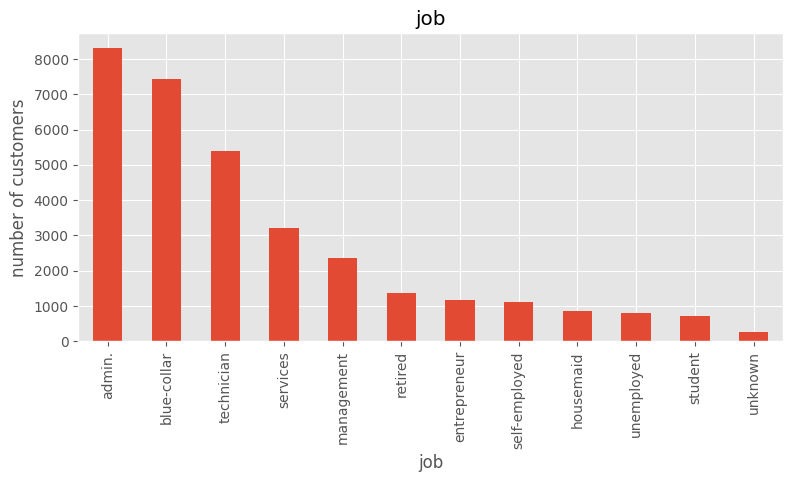

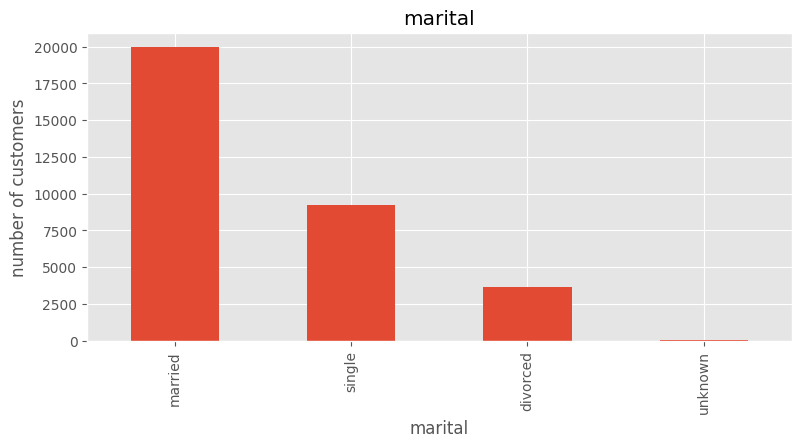

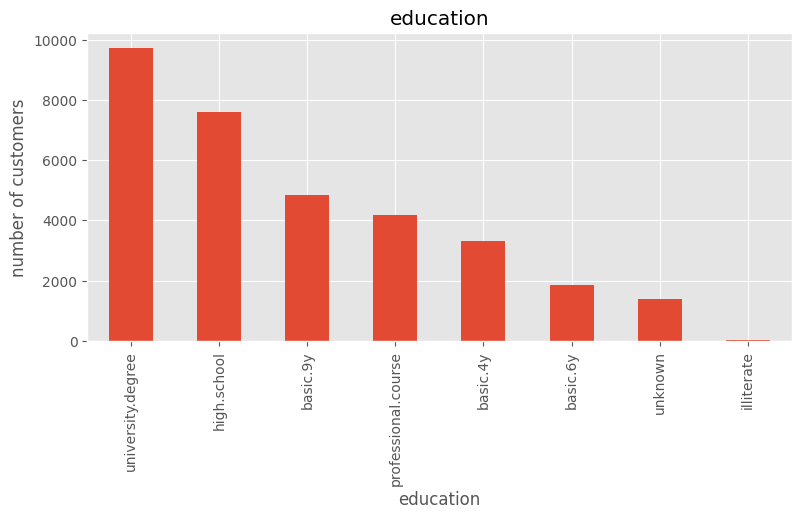

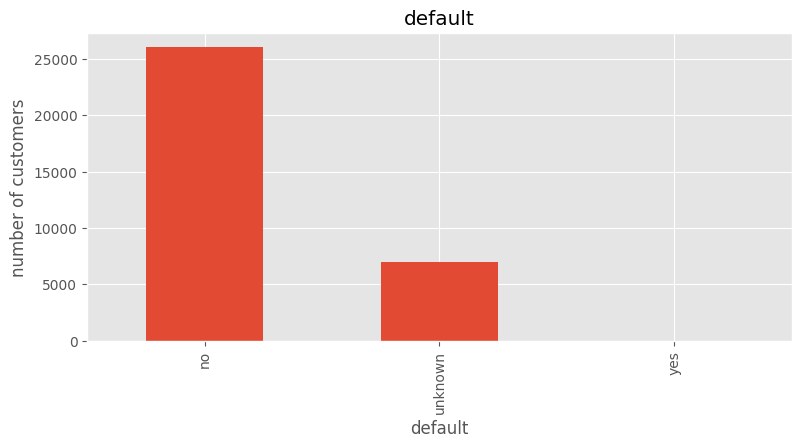

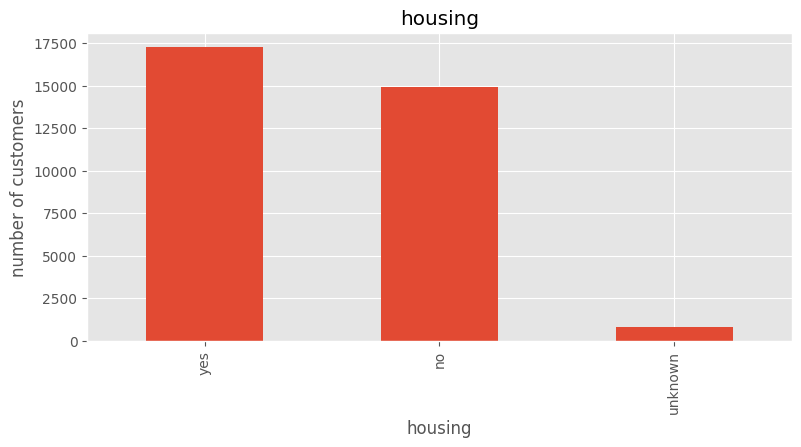

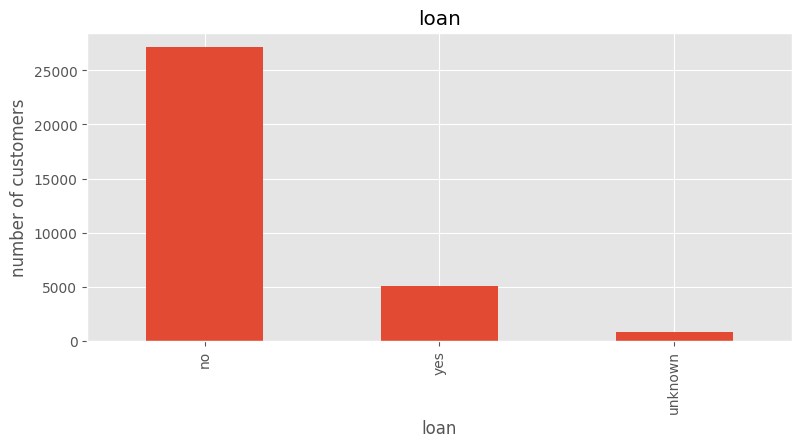

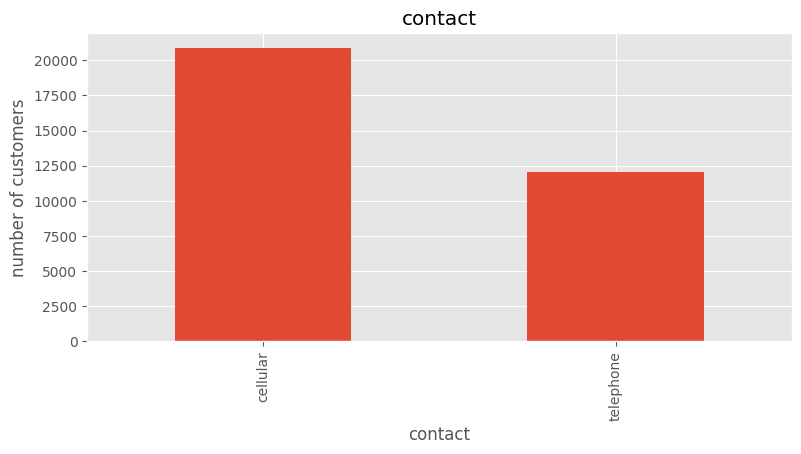

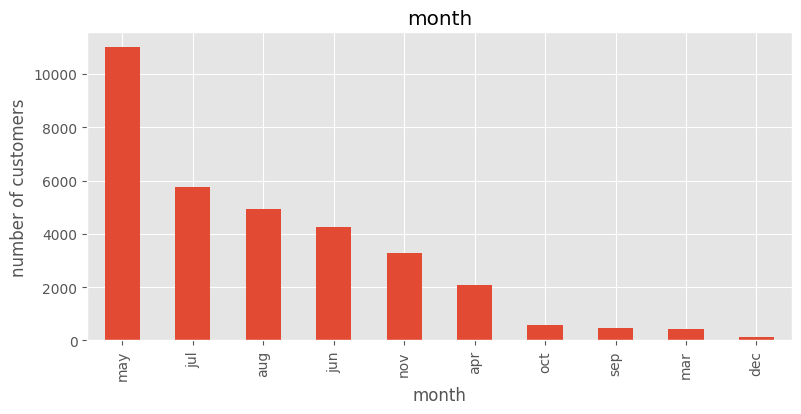

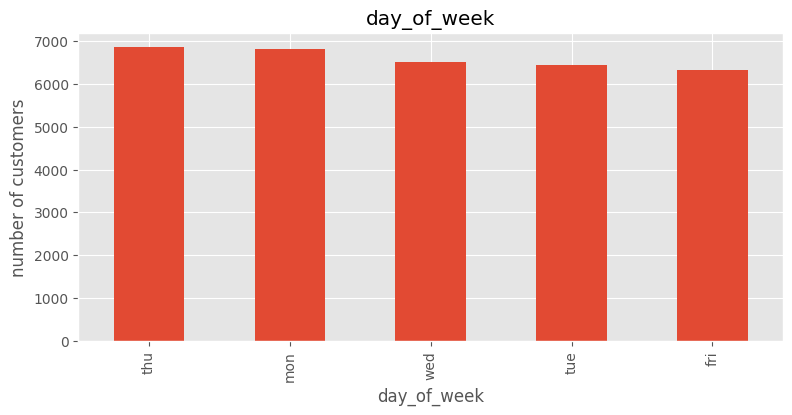

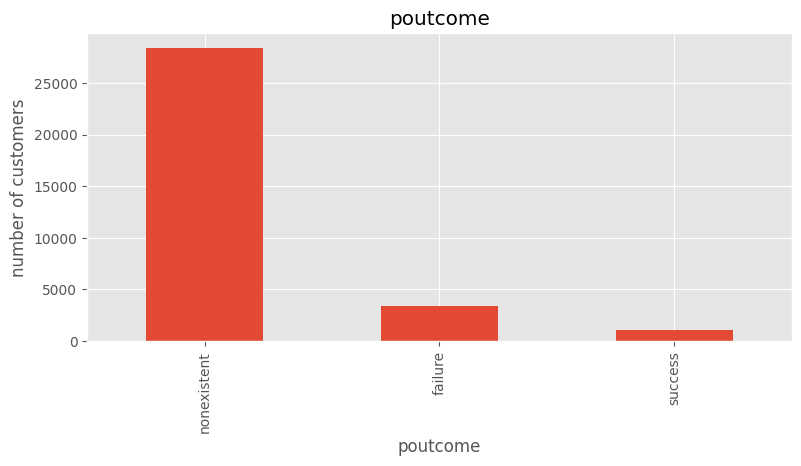

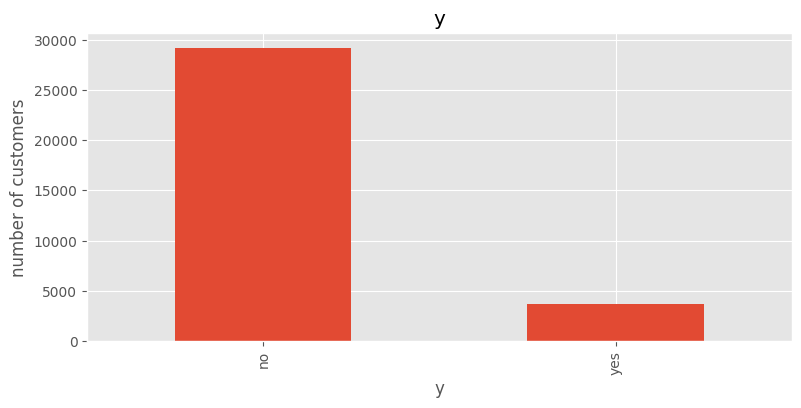

In [ ]:
# indentifying the categorical variables
cat_var= bank_data.select_dtypes(include= ["object"]).columns
print(cat_var)

# plotting bar chart for each categorical variable
plt.style.use("ggplot")

for column in cat_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    bank_data[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("number of customers")
    plt.title(column)

### Observations :
- The top three professions that our customers belong to are - administration, blue-collar jobs and technicians.
- A huge number of the customers are married.
- Majority of the customers do not have a credit in default
- Many of our past customers have applied for a housing loan but very few have applied for personal loans.
- Cell-phones seem to be the most favoured method of reaching out to customers.
- Many customers have been contacted in the month of **May**.
- The plot for the target variable shows heavy imbalance in the target variable.

Univariate analysis of numerical columns

<ipython-input-9-34121b805cbe>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data[column], kde=True)
<ipython-input-9-34121b805cbe>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data[column], kde=True)
<ipython-input-9-34121b805cbe>:6: UserWarning: 

`distplot` is a deprecated fu

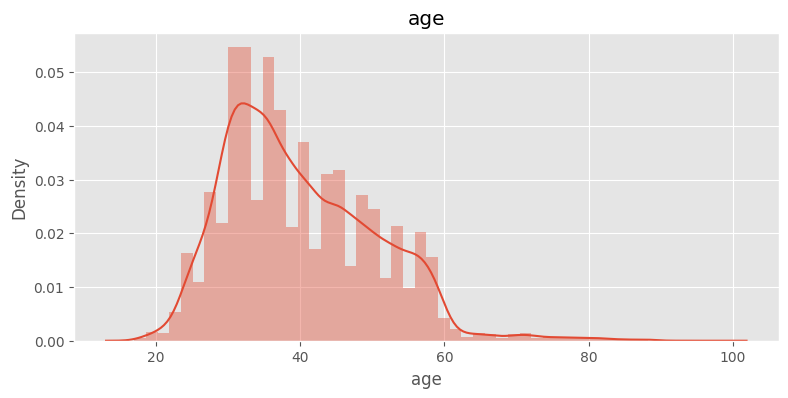

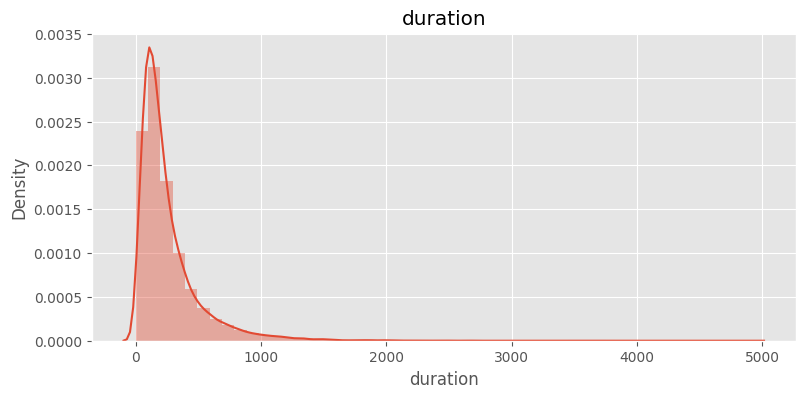

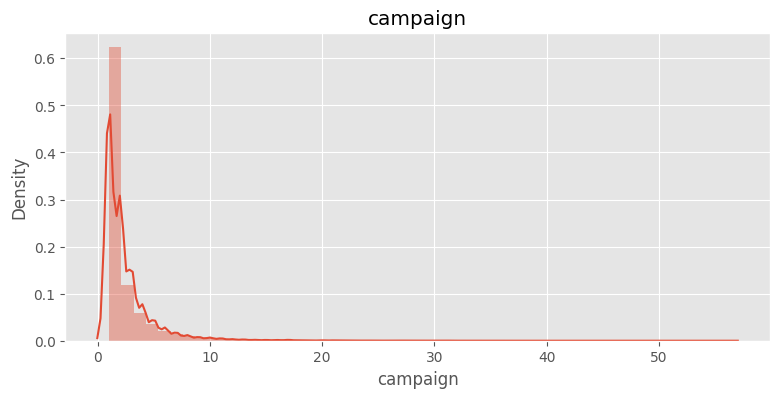

In [ ]:
# plotting histogram for each numerical variable
plt.style.use("ggplot")
for column in ["age", "duration", "campaign"]:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.distplot(bank_data[column], kde=True)
    plt.title(column)

<ipython-input-10-25fd14cbc273>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data[column], kde=True)


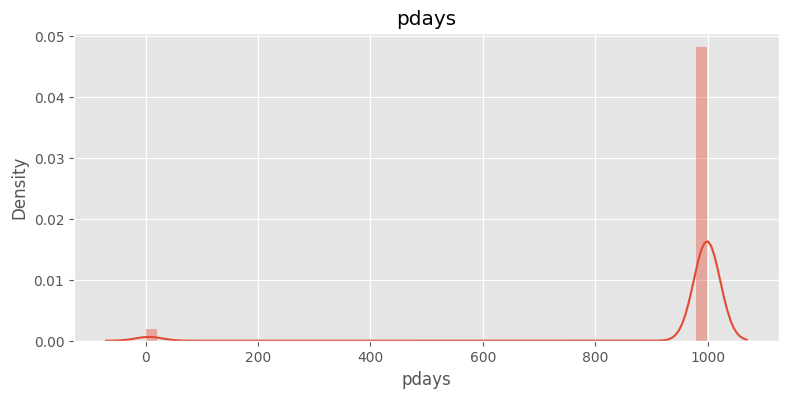

In [ ]:
plt.style.use("ggplot")
for column in ["pdays"]:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.distplot(bank_data[column], kde=True)
    plt.title(column)

### Observation :
- As we can see from the histogram, the features `age`, `duration` and `campaign` are heavily skewed and this is due to the presence of outliers as seen in the boxplot for these features.
- Looking at the plot for `pdays`, we can infer that majority of the customers were being contacted for the first time because as per the feature description for `pdays` the value 999 indicates that the customer had not been contacted previously.

Since `pdays` consists majorly only of a single value, it's variance is quite less and hence we can drop it since technically will be of no help in prediction.


Bivariate analysis of categorical columns

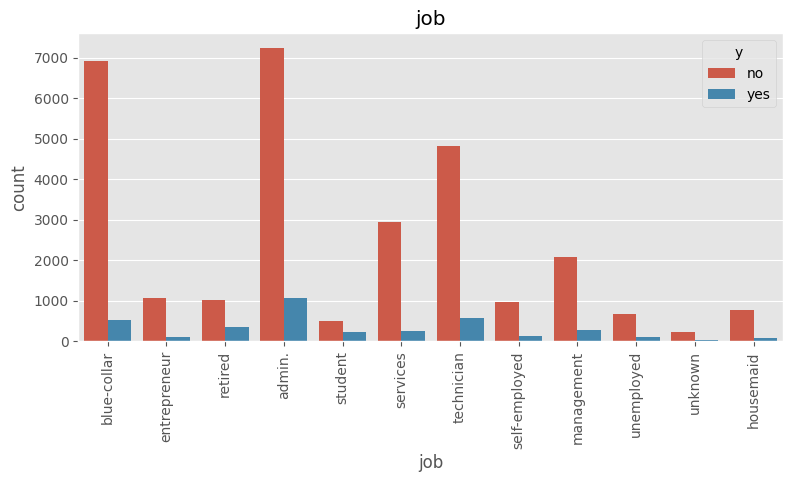

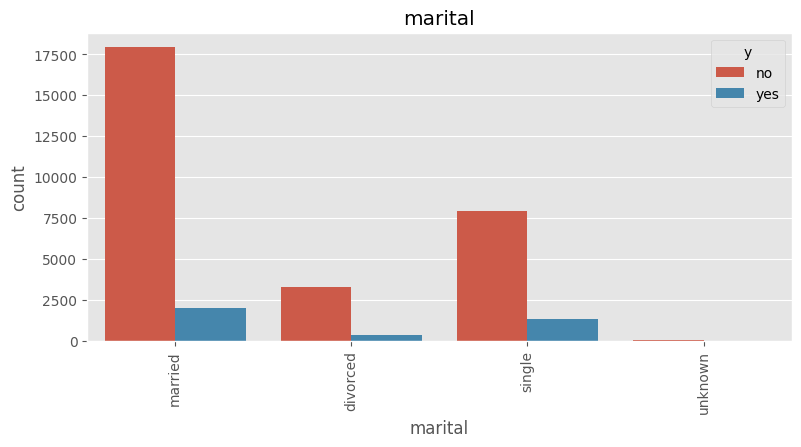

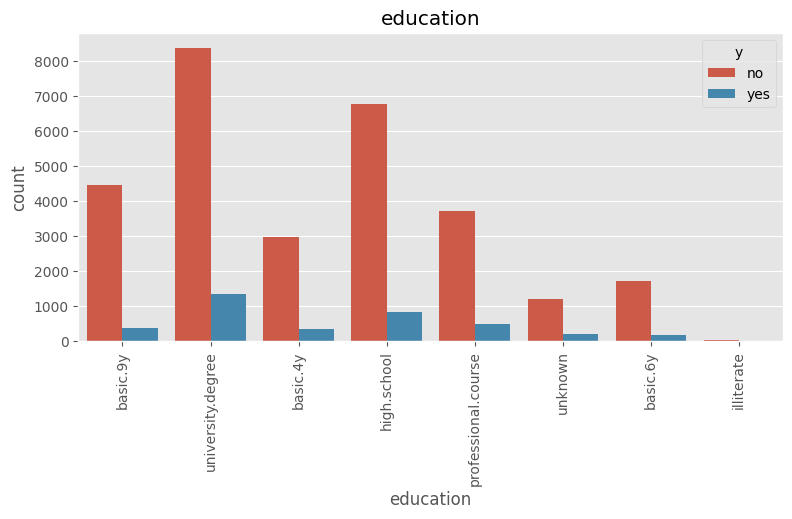

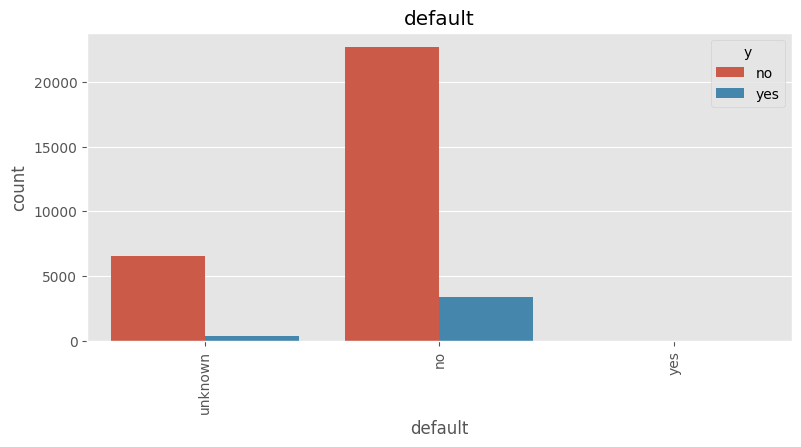

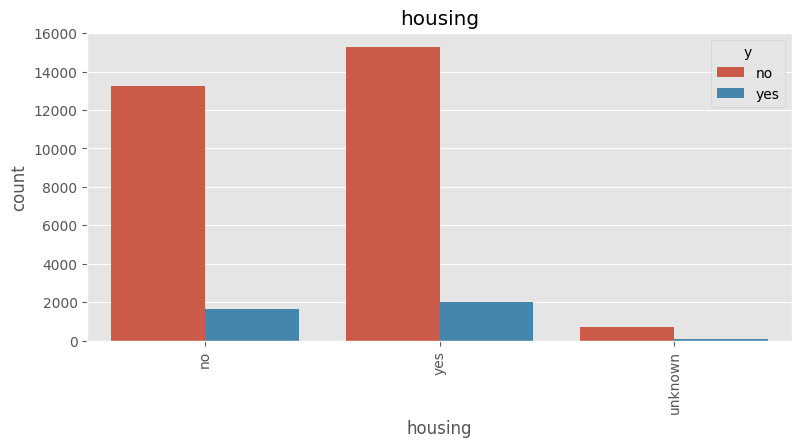

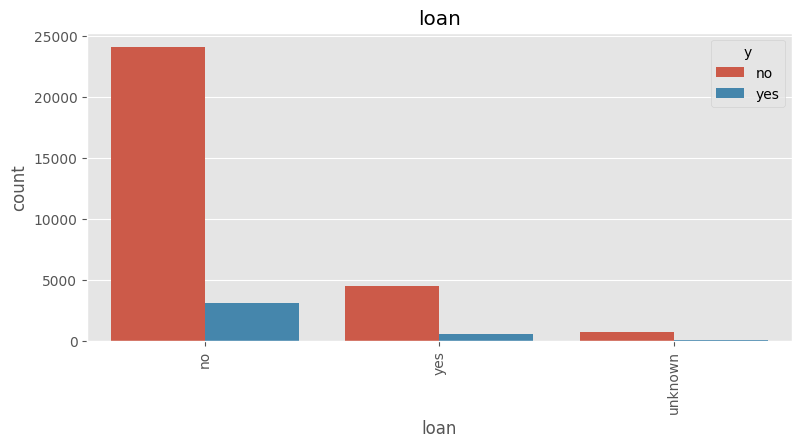

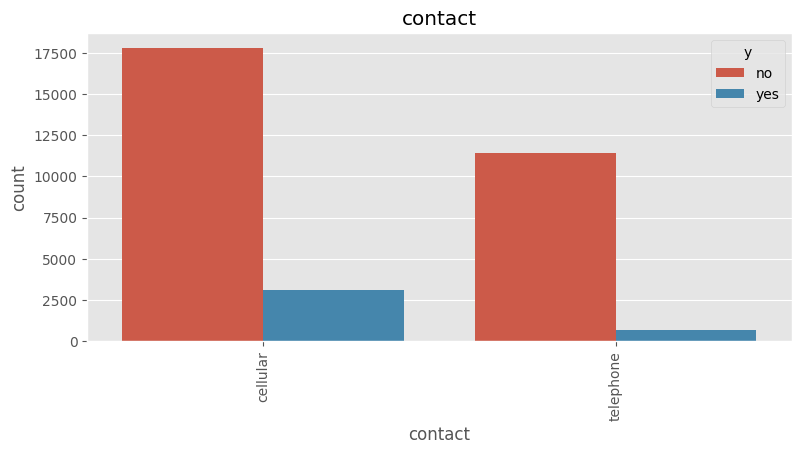

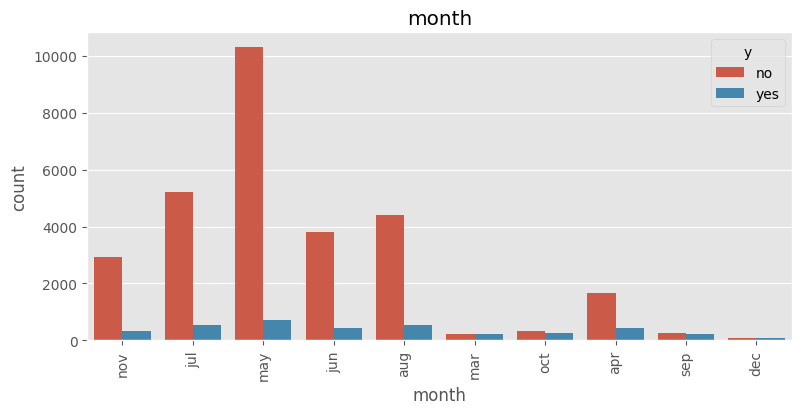

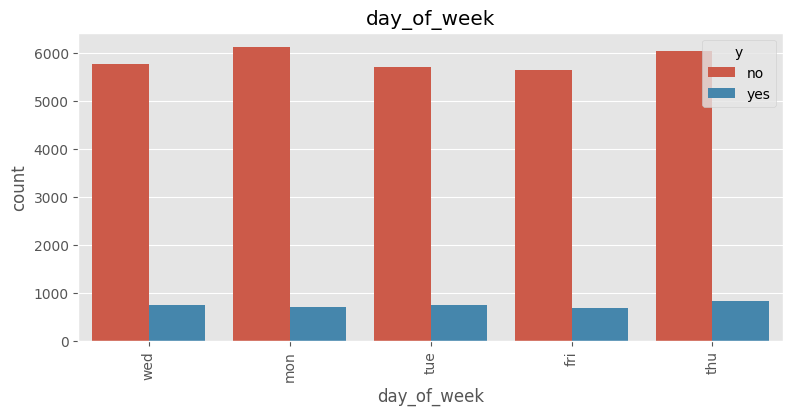

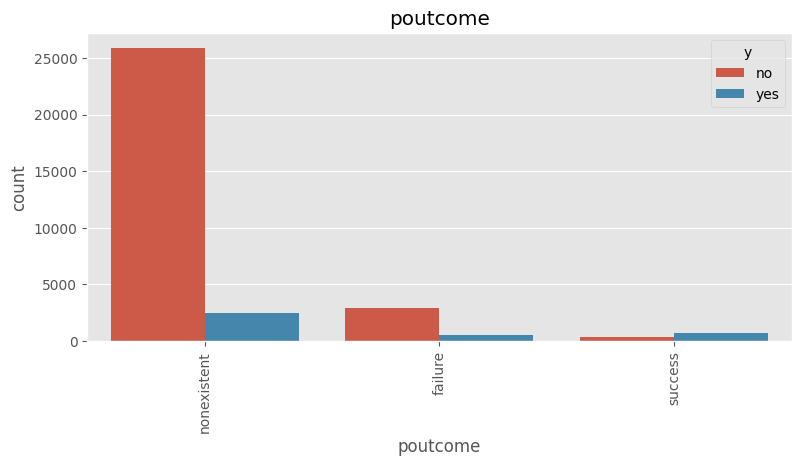

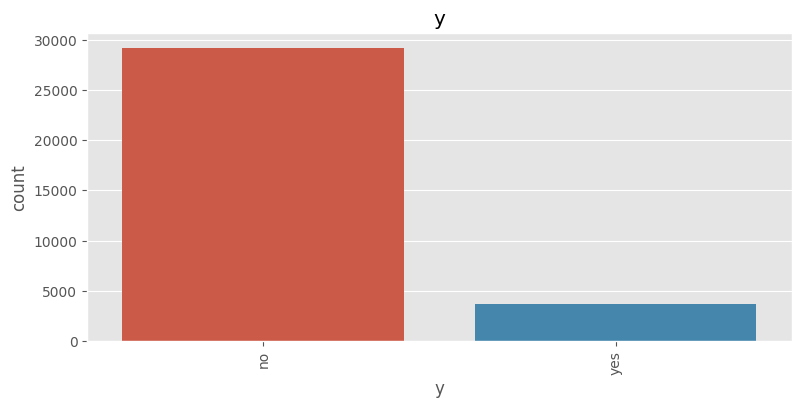

In [ ]:
plt.style.use("ggplot")
for column in cat_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(x=column, hue="y", data=bank_data)
    plt.title(column)
    plt.xticks(rotation=90)
    plt.show()


### Observations:

- Customers having administrative jobs form the majority amongst those who have subscirbed to the term deposit.
- They are married
- They hold a university degree
- They do not hold a credit in default
- Housing loan doesn't seem a priority to check for since an equal number of customers who have and have not subscribed to it seem to have subscribed to the term deposit.
- Cell-phones should be the preferred mode of contact for contacting customers.

<ipython-input-12-17e7547ca8d8>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=bank_data, x=bank_data["duration"], y=bank_data["poutcome"], ci=None, width=0.5)


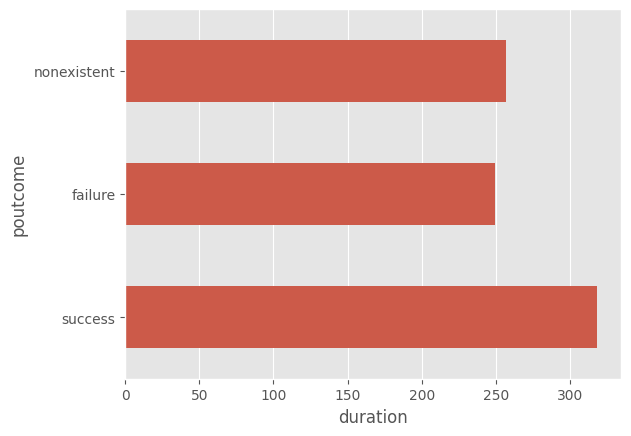

In [ ]:
sns.barplot(data=bank_data, x=bank_data["duration"], y=bank_data["poutcome"], ci=None, width=0.5)
plt.show()

This graph shows that the outcome was succesful for those clients whose call duration was the highest.

# Data cleaning

1) We're addressing the right-skew in 'age', 'duration', and 'campaign' by computing the Interquartile Range (IQR) and setting upper limits for outliers to maintain data consistency, which will support the accuracy of our collective analyses and models.

In [ ]:
original_descriptions = bank_data[["age", "duration", "campaign"]].describe()

# Applying IQR outlier capping
lower_boundaries = []
upper_boundaries = []
for i in ["age", "duration", "campaign"]:
    IQR = bank_data[i].quantile(0.75) - bank_data[i].quantile(0.25)
    lower_bound = bank_data[i].quantile(0.25) - (1.5 * IQR)
    upper_bound = bank_data[i].quantile(0.75) + (1.5 * IQR)
    bank_data.loc[bank_data[i] > upper_bound, i] = upper_bound
    bank_data.loc[bank_data[i] < lower_bound, i] = lower_bound
    lower_boundaries.append(lower_bound)
    upper_boundaries.append(upper_bound)

# Descriptions after capping the outliers
capped_descriptions = bank_data[["age", "duration", "campaign"]].describe()

print("Original Descriptions:")
print(original_descriptions)
print("\nDescriptions After Capping Outliers:")
print(capped_descriptions)


Original Descriptions:
                age      duration      campaign
count  32950.000000  32950.000000  32950.000000
mean      40.014112    258.127466      2.560607
std       10.403636    258.975917      2.752326
min       17.000000      0.000000      1.000000
25%       32.000000    103.000000      1.000000
50%       38.000000    180.000000      2.000000
75%       47.000000    319.000000      3.000000
max       98.000000   4918.000000     56.000000

Descriptions After Capping Outliers:
                age      duration      campaign
count  32950.000000  32950.000000  32950.000000
mean      39.935478    234.923915      2.271077
std       10.134734    176.854558      1.546302
min       17.000000      0.000000      1.000000
25%       32.000000    103.000000      1.000000
50%       38.000000    180.000000      2.000000
75%       47.000000    319.000000      3.000000
max       69.500000    643.000000      6.000000


In [ ]:
bank_data['default'].value_counts()

default
no         26007
unknown     6940
yes            3
Name: count, dtype: int64

2) We dropped the 'default' column due to its severe imbalance and the high number of 'unknown' entries, which could skew our model's predictions and reduce the clarity of our analysis.

In [ ]:
bank_data.drop('default', axis=1, inplace=True)

In [ ]:
bank_data['housing'].value_counts()

housing
yes        17254
no         14900
unknown      796
Name: count, dtype: int64

3) We've cleaned the 'housing' column by replacing 'unknown' values with the mode, ensuring a more accurate representation of the data by using the most frequent category. This step helps to maintain data integrity for subsequent analyses.

In [ ]:
mode_housing = bank_data['housing'].mode()[0]
bank_data['housing'] = bank_data['housing'].replace('unknown', mode_housing)
print(bank_data['housing'].value_counts())

housing
yes    18050
no     14900
Name: count, dtype: int64


In [ ]:
bank_data['job'].value_counts()

job
admin.           8314
blue-collar      7441
technician       5400
services         3196
management       2345
retired          1366
entrepreneur     1160
self-employed    1099
housemaid         855
unemployed        798
student           711
unknown           265
Name: count, dtype: int64

4) We addressed missing data in the 'job' column by initially replacing 'unknown' values with NaN to clearly mark them as missing. Subsequently, we removed all rows where 'job' is NaN to ensure our dataset only contains entries with valid job information. This cleanup improves the quality and accuracy of our data for analysis.

In [ ]:
bank_data['job'] = bank_data['job'].replace('unknown', pd.NA)
bank_data.dropna(subset=['job'], inplace=True)
print(bank_data['job'].value_counts())

job
admin.           8314
blue-collar      7441
technician       5400
services         3196
management       2345
retired          1366
entrepreneur     1160
self-employed    1099
housemaid         855
unemployed        798
student           711
Name: count, dtype: int64


In [ ]:
bank_data['education'].value_counts()

education
university.degree      9698
high.school            7567
basic.9y               4799
professional.course    4184
basic.4y               3278
basic.6y               1845
unknown                1298
illiterate               16
Name: count, dtype: int64

In [ ]:
bank_data['marital'].value_counts()

marital
married     19769
single       9195
divorced     3664
unknown        57
Name: count, dtype: int64

5) We tackled missing values in categorical columns ('education', 'loan', 'marital', 'job', 'housing') by first converting 'unknown' entries to NaN and then encoding the categories numerically. We utilized KNN imputation to estimate missing values using related features specified in reference_columns. After imputation, we decoded the numeric values back to their original categorical representations. This method ensures that our dataset retains its integrity, enhancing the reliability of our subsequent analyses.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency, f_oneway

# Function to perform Chi-squared test and return p-value
def chi2_test(crosstab):
    chi2, p, dof, ex = chi2_contingency(crosstab)
    return p

# Function to perform ANOVA and return p-value
def anova_test(grouped_data, numerical_variable):
    categories = grouped_data.groups.keys()
    anova_data = [grouped_data.get_group(cat)[numerical_variable] for cat in categories]
    anova_results = f_oneway(*anova_data)
    return anova_results.pvalue

# Calculating p-values and compiling them into a DataFrame
p_values = pd.DataFrame(index=['education', 'marital'], columns=['job', 'age', 'housing'])

# Looping through each combination and performing the appropriate test
for row in p_values.index:
    for col in p_values.columns:
        if col == 'age':
            # For 'age', performing ANOVA since 'age' is numerical
            grouped_data = bank_data.groupby(row)
            p_values.at[row, col] = anova_test(grouped_data, 'age')
        else:
            # For 'job' and 'housing', performing Chi-squared test
            crosstab = pd.crosstab(bank_data[row], bank_data[col])
            p_values.at[row, col] = chi2_test(crosstab)

print(p_values)



           job  age   housing
education  0.0  0.0  0.002808
marital    0.0  0.0  0.000686


In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder


encode_columns = ['education', 'marital', 'job', 'housing']
reference_columns = {
    'education': ['job', 'age', 'housing'],
    'marital': ['age', 'job', 'housing']
}

label_encoders = {}

for column in encode_columns:
    if bank_data[column].dtype == 'object':
        bank_data[column] = np.where(bank_data[column] == 'unknown', np.nan, bank_data[column])
        valid_indices = bank_data[column].notna()
        le = LabelEncoder()

        if valid_indices.any():
            le.fit(bank_data[column][valid_indices])

            bank_data.loc[valid_indices, column] = le.transform(bank_data[column][valid_indices])
            label_encoders[column] = le

# Applying KNN imputation for each target column using specified reference columns
for target, refs in reference_columns.items():
    # Initialize the KNN Imputer
    knn_imputer = KNNImputer(n_neighbors=3)
    imputation_data = bank_data[refs + [target]].copy()
    bank_data.loc[:, refs + [target]] = knn_imputer.fit_transform(imputation_data)

    if target in label_encoders:
        valid_indices = bank_data[target].notna()
        bank_data.loc[valid_indices, target] = label_encoders[target].inverse_transform(bank_data[target][valid_indices].astype(int))

print(bank_data[['education', 'marital']].head())

           education   marital
0           basic.9y   married
1  university.degree   married
2           basic.4y   married
3  university.degree   married
4  university.degree  divorced


In [ ]:
bank_data['pdays'].value_counts()

pdays
999    31476
3        349
6        332
4         96
2         50
7         47
9         45
10        43
12        40
5         40
13        27
11        21
15        21
1         21
14        18
8         13
0         12
16         9
17         8
18         6
22         3
19         2
21         2
27         1
25         1
20         1
26         1
Name: count, dtype: int64

6) We decided to drop the 'pdays' column from our dataset after evaluating its value counts, which showed a large proportion of a single value. This distribution suggests that 'pdays' may not provide significant variability or predictive power for our modeling efforts.

In [ ]:
bank_data.drop('pdays', axis=1, inplace=True)

7) We have implemented random sampling imputation on the 'loan' column to fill missing values, ensuring the overall distribution remains consistent with the original data.

In [ ]:
bank_data['loan'].value_counts()

loan
no         26918
yes         4975
unknown      792
Name: count, dtype: int64

In [ ]:
# Isolating the non-missing 'loan' values
non_missing_loans = bank_data['loan'].dropna()

# Sampling from these non-missing values and using these to fill in the missing values
bank_data['loan'] = bank_data['loan'].apply(
    lambda x: np.random.choice(non_missing_loans) if pd.isnull(x) else x
)

Encoding Categorical Features


Machine learning algorithm can only read numerical values. It is therefore essential to encode categorical features into numerical values


In [ ]:
categorical_var=bank_data.select_dtypes(include=["object"]).columns
print(categorical_var)

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for feature in categorical_var:
    bank_data[feature]=le.fit_transform(bank_data[feature])

bank_data.head(5)

Index(['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month',
       'day_of_week', 'poutcome', 'y'],
      dtype='object')


,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,y
0,49.0,1,1,2,0,0,0,7,4,227,4,0,1,0
1,37.0,2,1,6,0,0,1,7,4,202,2,1,0,0
2,69.5,5,1,0,0,0,0,3,1,643,1,0,1,1
3,36.0,0,1,6,1,0,1,6,1,120,2,0,1,0
4,59.0,5,0,6,0,0,0,4,3,368,2,0,1,0


## Checking correlation of feature variables

<Axes: >

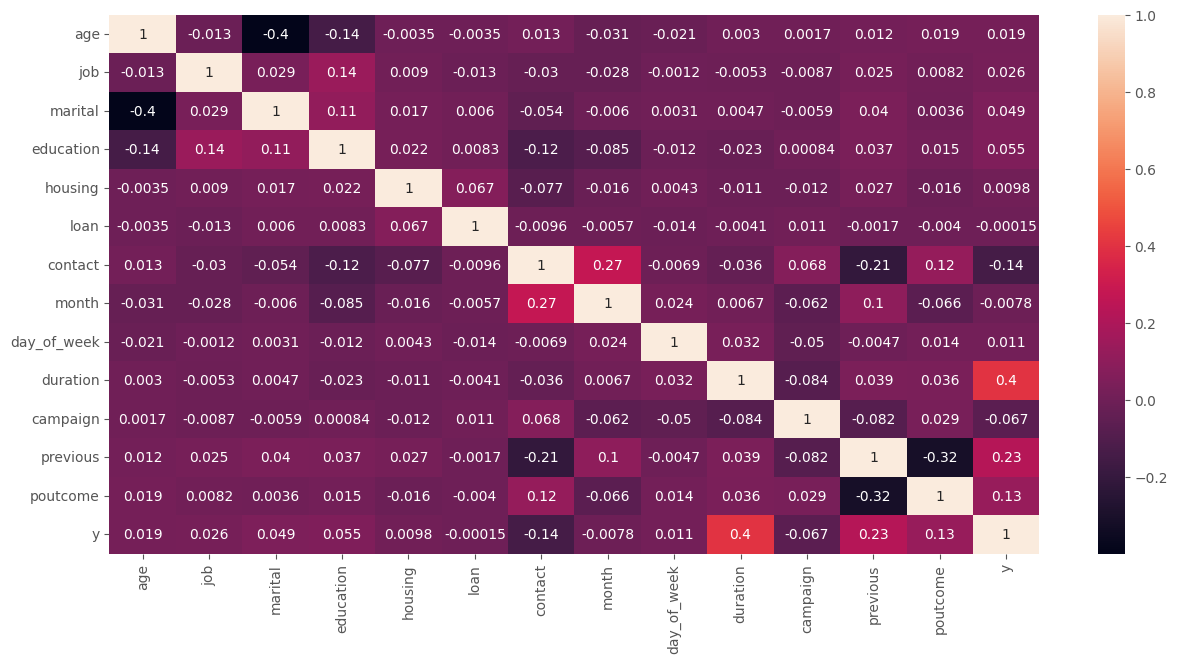

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(bank_data.corr(), annot=True)

There are no features that are highly correlated and inversely correlated. If we had, we could have written the condition that if the correlation is higher than 0.8 (or can be any threshold value depending on the domain knowledge) and less than -0.8, we could have drop those features. Because those correlated features would have been doing the same job.

In [ ]:
corr_matrix=bank_data.corr()
corr_matrix["y"].sort_values(ascending=False)

y              1.000000
duration       0.400641
previous       0.228654
poutcome       0.129862
education      0.054846
marital        0.048950
job            0.026214
age            0.019435
day_of_week    0.011251
housing        0.009759
loan          -0.000149
month         -0.007807
campaign      -0.067055
contact       -0.143193
Name: y, dtype: float64

## Handling imbalanced dataset


In [ ]:
# target class count
bank_data["y"].value_counts()

y
0    29006
1     3679
Name: count, dtype: int64

Since the class distribution in the target variable is ~89:11 indicating an imbalance dataset, we need to resample it.

In [ ]:
X = bank_data.drop('y', axis=1)
y = bank_data['y']

#initialising oversampling
smote= SMOTETomek(sampling_strategy=0.75)

# Implementing oversampling on training data
x_sm, y_sm = smote.fit_resample(X, y)

print(y_sm.value_counts())

y
0    28887
1    21635
Name: count, dtype: int64


# Training the model



Splitting the resampled data in train & test data


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x_sm, y_sm, test_size=0.2, random_state=42)

Standardising the features


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

Logistic Regression & Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler


# Defining the logistic regression model and hyperparameters
logistic_model = LogisticRegression(max_iter=1000)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Using GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)

# Using the best estimator to make predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred), sep="\n")

Best parameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Confusion Matrix:
[[4907  881]
 [1063 3254]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      5788
           1       0.79      0.75      0.77      4317

    accuracy                           0.81     10105
   macro avg       0.80      0.80      0.80     10105
weighted avg       0.81      0.81      0.81     10105

Accuracy Score: 0.807619990103909
F1 score:
0.7699952673923331


### Random Forest with hyperparameter tuning (our best performing model)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt'],
    'max_depth': [None, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 2]
}

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    verbose=1,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train_scaled, y_train)

# Extracting the best estimator
best_rf = random_search.best_estimator_

# Making predictions using the best estimator
y_pred_rf = best_rf.predict(X_test_scaled)

# Output results
print('Best Parameters:', random_search.best_params_)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))
print('Classification Report:')
print(classification_report(y_test, y_pred_rf))
print('Accuracy Score:', accuracy_score(y_test, y_pred_rf))
print('F1 Score:', f1_score(y_test, y_pred_rf, average='macro'))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Confusion Matrix:
[[5293  495]
 [ 292 4025]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      5788
           1       0.89      0.93      0.91      4317

    accuracy                           0.92     10105
   macro avg       0.92      0.92      0.92     10105
weighted avg       0.92      0.92      0.92     10105

Accuracy Score: 0.922117763483424
F1 Score: 0.9208718237740507


### Support Vector Machine

In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel='linear', random_state=42)

clf.fit(X_train_scaled, y_train)

# Making predictions on the scaled testing set
y_pred = clf.predict(X_test_scaled)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred), sep="\n")

Confusion Matrix:
[[4936  852]
 [1109 3208]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      5788
           1       0.79      0.74      0.77      4317

    accuracy                           0.81     10105
   macro avg       0.80      0.80      0.80     10105
weighted avg       0.81      0.81      0.81     10105

Accuracy Score: 0.8059376546264225
F1 score:
0.7659066491584099


### ADA Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators = 300)

ada_clf.fit (X_train_scaled, y_train)
y_pred = ada_clf.predict(X_test_scaled)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred), sep="\n")

Confusion Matrix:
[[5210  578]
 [ 653 3664]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      5788
           1       0.86      0.85      0.86      4317

    accuracy                           0.88     10105
   macro avg       0.88      0.87      0.88     10105
weighted avg       0.88      0.88      0.88     10105

Accuracy Score: 0.878179119247897
F1 score:
0.8561747867741558


### XG Boost

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier

xg_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

xg_clf.fit(X_train_scaled, y_train)

# Making predictions on the testing set
y_pred = xg_clf.predict(X_test_scaled)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred), sep="\n")


Confusion Matrix:
[[5344  444]
 [ 380 3937]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      5788
           1       0.90      0.91      0.91      4317

    accuracy                           0.92     10105
   macro avg       0.92      0.92      0.92     10105
weighted avg       0.92      0.92      0.92     10105

Accuracy Score: 0.9184562097971302
F1 score:
0.9052655782938606


### Ensemble Method with soft voting

In [ ]:
from sklearn.ensemble import VotingClassifier

# Reduced complexity models
logistic = LogisticRegression(solver='liblinear', max_iter=50)
random_forest = RandomForestClassifier(n_estimators=50, max_depth=5)
svm = SVC(kernel='linear', probability=True, max_iter=1000)
adaboost = AdaBoostClassifier(n_estimators=50)
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=50)

# Create the voting classifier with reduced models and parallel processing
voting_classifier = VotingClassifier(
    estimators=[
        ('logistic', logistic),
        ('random_forest', random_forest),
        ('svm', svm),
        ('adaboost', adaboost),
        ('xgboost', xgboost)
    ],
    voting='soft',
    n_jobs=-1  # Use all CPU cores
)

# Fitting the ensemble
voting_classifier.fit(X_train_scaled, y_train)

# Predicting on the test data
y_pred = voting_classifier.predict(X_test_scaled)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Accuracy Score:', accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred, average='binary'), sep="\n")


Confusion Matrix:
[[5204  584]
 [ 632 3685]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      5788
           1       0.86      0.85      0.86      4317

    accuracy                           0.88     10105
   macro avg       0.88      0.88      0.88     10105
weighted avg       0.88      0.88      0.88     10105

Accuracy Score: 0.8796635329045027
F1 score:
0.8583740973678081


###Prediction using the best model

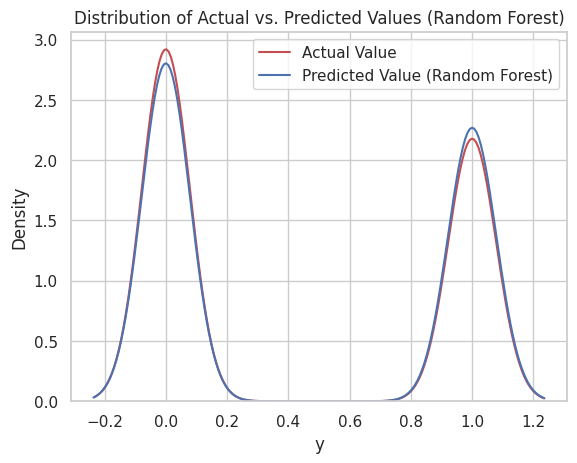

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rf_model.fit(x_train, y_train)

# Plotting the distribution of actual vs predicted values
sns.set(style="whitegrid")
ax = sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(y_pred_rf, color="b", ax=ax, label="Predicted Value (Random Forest)")
plt.legend(loc="best")
plt.title('Distribution of Actual vs. Predicted Values (Random Forest)')
plt.show()


# Experiment where we try using knn 5

Changing KNN to 5

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import numpy as np

encode_columns = ['education','marital', 'job', 'housing']
reference_columns = {
    'education': ['job', 'age', 'housing'],
    'marital': ['age', 'job', 'housing']
}

label_encoders = {}

for column in encode_columns:
    if bank_data[column].dtype == 'object':
        bank_data[column] = np.where(bank_data[column] == 'unknown', np.nan, bank_data[column])
        valid_indices = bank_data[column].notna()
        le = LabelEncoder()

        if valid_indices.any():
            le.fit(bank_data[column][valid_indices])

            bank_data.loc[valid_indices, column] = le.transform(bank_data[column][valid_indices])
            label_encoders[column] = le

# Appling KNN imputation for each target column using specified reference columns
for target, refs in reference_columns.items():
    # Initialize the KNN Imputer to 5 for trial
    knn_imputer = KNNImputer(n_neighbors=5)
    imputation_data = bank_data[refs + [target]].copy()
    bank_data.loc[:, refs + [target]] = knn_imputer.fit_transform(imputation_data)

    if target in label_encoders:
        valid_indices = bank_data[target].notna()
        bank_data.loc[valid_indices, target] = label_encoders[target].inverse_transform(bank_data[target][valid_indices].astype(int))

# Verifying the results
print(bank_data[['education','marital']].head())


   education  marital
0          2        1
1          6        1
2          0        1
3          6        1
4          6        0


In [ ]:
categorical_var=bank_data.select_dtypes(include=["object"]).columns
categorical_var

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for feature in categorical_var:
    bank_data[feature]=le.fit_transform(bank_data[feature])

bank_data.head(5)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,y
0,49.0,1,1,2,0,0,0,7,4,227,4,0,1,0
1,37.0,2,1,6,0,0,1,7,4,202,2,1,0,0
2,69.5,5,1,0,0,0,0,3,1,643,1,0,1,1
3,36.0,0,1,6,1,0,1,6,1,120,2,0,1,0
4,59.0,5,0,6,0,0,0,4,3,368,2,0,1,0


In [ ]:
X = bank_data.drop('y', axis=1)
y = bank_data['y']

#initialising oversampling
smote= SMOTETomek(sampling_strategy=0.75)

# Implementing oversampling on training data
x_sm, y_sm = smote.fit_resample(X, y)

# x_sm and y_sm are the resampled data

# Target class count of resampled dataset
print(y_sm.value_counts())

y
0    28885
1    21633
Name: count, dtype: int64


In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x_sm, y_sm, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt'],
    'max_depth': [None, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 2]
}

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    verbose=1,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train_scaled, y_train)

# Extracting the best estimator
best_rf = random_search.best_estimator_

# Making predictions using the best estimator
y_pred_rf = best_rf.predict(X_test_scaled)

# Output results
print('Best Parameters:', random_search.best_params_)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))
print('Classification Report:')
print(classification_report(y_test, y_pred_rf))
print('Accuracy Score:', accuracy_score(y_test, y_pred_rf))
print('F1 Score:', f1_score(y_test, y_pred_rf, average='macro'))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Confusion Matrix:
[[5258  492]
 [ 327 4027]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      5750
           1       0.89      0.92      0.91      4354

    accuracy                           0.92     10104
   macro avg       0.92      0.92      0.92     10104
weighted avg       0.92      0.92      0.92     10104

Accuracy Score: 0.9189429928741093
F1 Score: 0.9177217145077793


## Since knn 3 was giving better results hence we decided to go ahead with knn 3 and not 5

# Business Perspective for our results (for the best model)

In the business context of your bank's direct marketing campaigns, precision is a measure of how accurate your model is when it predicts that a client will subscribe to a term deposit.

For class 0 (no subscription), a precision of 0.95 means that when the model predicts a client will not subscribe, it is correct 95% of the time. This is quite high, which suggests that the bank can confidently use the model to identify clients who are unlikely to subscribe and perhaps limit marketing resources or tailor different strategies for them.

For class 1 (subscription), a precision of 0.89 means that when the model predicts a client will subscribe to a term deposit, it is correct 89% of the time. This indicates the model is also quite reliable in predicting potential subscribers. For the bank, this could mean focusing efforts and resources more efficiently on clients who are predicted to subscribe, thus potentially increasing the conversion rate and optimizing the allocation of marketing efforts.

In summary, high precision indicates that the model produces a low number of false positives, which in a business sense means that the bank will not spend much time or resources on clients who are unlikely to subscribe. This can help in increasing the ROI of marketing campaigns by targeting the right individuals more effectively.